In [6]:
import os
import cv2
import torch
from torchvision import transforms
from PIL import Image  # Import PIL for image conversion

# Define your images and masks directories
images_dir = "/Users/maryamrehmatulla/Desktop/folder"
masks_dir = "/Users/maryamrehmatulla/Desktop/folder"  # Assuming masks are in the same directory

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to Tensor
    transforms.Resize((256, 256)),  # Resize images and masks to (256, 256)
])

def preprocess_data(images_dir, masks_dir, transform):
    images = []
    masks = []
    
    # Iterate through images in the directory
    for img_name in os.listdir(images_dir):
        if not img_name.endswith('.png'):  # Ensure only PNG files are processed
            continue
        
        img_path = os.path.join(images_dir, img_name)
        mask_path = os.path.join(masks_dir, img_name)  # Assuming mask names are the same as image names
        
        # Read images and masks
        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Read mask as grayscale
        
        # Check if images are loaded properly
        if img is None or mask is None:
            continue
        
        # Apply transformations
        img = transform(img)
        mask = transform(mask)
        
        # Append to lists
        images.append(img)
        masks.append(mask)
    
    return images, masks

# Preprocess data
images, masks = preprocess_data(images_dir, masks_dir, transform)

# Convert lists to PyTorch tensors
images_tensor = torch.stack(images)
masks_tensor = torch.stack(masks)

# Print shapes for verification
print(f"Images tensor shape: {images_tensor.shape}")
print(f"Masks tensor shape: {masks_tensor.shape}")


Images tensor shape: torch.Size([2, 3, 256, 256])
Masks tensor shape: torch.Size([2, 1, 256, 256])


Epoch 0/59
----------
LR 0.0001


/Users/maryamrehmatulla/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


train: bce: 0.669117, dice: 0.990397, loss: 0.829757
val: bce: 0.656761, dice: 0.990617, loss: 0.823689
saving best model
1m 56s
Epoch 1/59
----------
LR 0.0001
train: bce: 0.647043, dice: 0.990416, loss: 0.818729
val: bce: 0.628470, dice: 0.990652, loss: 0.809561
saving best model
1m 25s
Epoch 2/59
----------
LR 0.0001
train: bce: 0.613777, dice: 0.990470, loss: 0.802123
val: bce: 0.585238, dice: 0.990766, loss: 0.788002
saving best model
1m 22s
Epoch 3/59
----------
LR 0.0001
train: bce: 0.561326, dice: 0.990655, loss: 0.775990
val: bce: 0.511968, dice: 0.991115, loss: 0.751542
saving best model
1m 24s
Epoch 4/59
----------
LR 0.0001
train: bce: 0.463201, dice: 0.991229, loss: 0.727215
val: bce: 0.350721, dice: 0.992365, loss: 0.671543
saving best model
1m 34s
Epoch 5/59
----------
LR 0.0001
train: bce: 0.224363, dice: 0.993974, loss: 0.609168
val: bce: 0.056577, dice: 0.997656, loss: 0.527117
saving best model
1m 35s
Epoch 6/59
----------
LR 0.0001
train: bce: 0.093629, dice: 0.9956

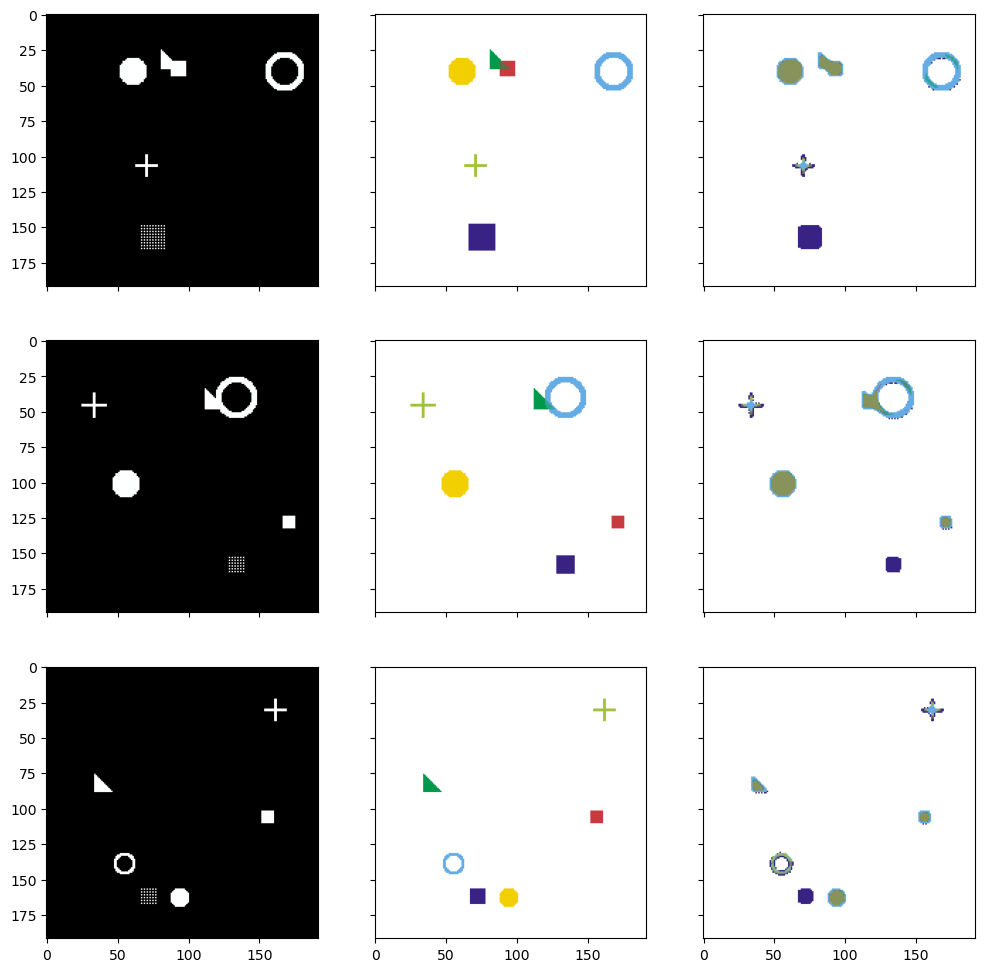

In [7]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Assuming you have images_tensor and masks_tensor from your preprocessing step
dataset = TensorDataset(images_tensor, masks_tensor)
batch_size = 2  # Adjust batch size as needed
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

from Model import UNet  # Import your U-Net model

# Instantiate your U-Net model
model = UNet(n_class=1)  # Adjust n_class according to your task (e.g., number of classes for segmentation)

# Load model weights if needed
# model.load_state_dict(torch.load('path_to_your_model_weights.pth'))

model.eval()  # Set model to evaluation mode
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Choose device

predictions = []

# Iterate through the DataLoader for inference
with torch.no_grad():
    for images, masks in dataloader:
        images = images.to(device)
        
        # Perform inference
        outputs = model(images)
        
        # Assuming your model outputs logits, you might want to apply a sigmoid activation for probabilities
        # For example:
        # outputs = torch.sigmoid(outputs)
        
        # Append predictions (outputs) to the list
        predictions.append(outputs.cpu().detach())  # Detach and move to CPU if necessary

# Convert predictions list to a single tensor
predictions_tensor = torch.cat(predictions, dim=0)

# Print or process predictions as needed
print(f"Predictions tensor shape: {predictions_tensor.shape}")

